I want to create a CRNN testing utility

I have csv file containing two columns "file_name" and "digit". I have a folder called "digits" containing 200000 image files of images of digits.

I want to create the train and test datasets and crnn model

Can you provide the steps and code for this please

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

import sys
sys.path.append("../project_functions/")
import ad_functions as adfns
import ad_crnn_functions as adcrn


import pandas as pd
import numpy as np
import cv2
from keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import (
    Input, 
    Conv2D, 
    MaxPooling2D, 
    Reshape, 
    Bidirectional, 
    LSTM, 
    Dense, 
    BatchNormalization, 
    Activation,
    Dropout, 
    Softmax, 
    TimeDistributed,
    Flatten
)



## Load the Dataset

In [3]:
data = pd.read_csv('s11_bw_created_files.csv')

In [4]:
# Load the dataset and split it into train and test sets
def load_images(file_names):
    images = []
    for file_name in file_names:
        print(file_name)
        full_path_image = ("./s11_mod_traindata/"+file_name+".png")
        # print(full_path_image)
        # image = cv2.imread(os.path.join('./bw_digits', file_name, '.png'), cv2.IMREAD_GRAYSCALE)
        image = cv2.imread(full_path_image, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        image = np.expand_dims(image, axis=-1)
        images.append(image)
    return np.array(images)


In [5]:

X = load_images(data['filename'].values)
y = data['digit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


veAjmhHv_0
xbbrkVdi_0
EPXPGcAL_0
wj1Xqsw5_0
KXUhE7zC_0
hBjGKt6P_0
ubMkuhVU_0
8usdiVzg_0
zFQu8nIR_0
yGrRT92j_0
cgEotUNF_0
0fAgeK0X_0
TDvA0MK3_0
YrwMZfgZ_0
gXaXUxmi_0
bKvE1Rm3_0
po1MKdMO_0
46o1BsUM_0
3hFp35ic_0
rfbArvxe_0
JkDn47kO_0
lnTuDG0O_0
QjOkK8It_0
eS3LC4lC_0
FHb8yXRn_0
W8KxCgvn_0
6Aiyrdpw_0
BrBOpWIh_0
nqH5Q1D7_0
JKfnoA2D_0
LbkNFXO7_0
7BZg1CnC_0
Bz5RQZBx_0
zx0Ot86v_0
XW0osXPt_0
EXwCIVGa_0
NEyYc2BH_0
SVreeT8T_0
6spGuCGM_0
KUetvsfD_0
XKpzqE4w_0
Tzuo0RHL_0
4xqH49vN_0
GVatunqg_0
EpLq7YnW_0
jKNHfRW6_0
IJUUcd9d_0
I2wTyEIG_0
VXPp2Mc7_0
Ok3Bxxwq_0
5iuwNZNe_0
aOnidPK2_0
EoXOv7cW_0
TwEOTZUu_0
WcQFVN8j_0
bKJWS18J_0
LyniW4wT_0
3tiaMwLP_0
n9Uzf49X_0
dMatCSq8_0
2SbjkqsY_0
MyFLsQTk_0
3twoxlPf_0
EZ7aQQFx_0
OWcQwt0v_0
nbNbaiSA_0
ehkloHUx_0
jTalADWT_0
pg2FUEEV_0
mzN37CT3_0
1ppMFFP1_0
YL2NdV6j_0
AkAv4ONG_0
0UDMWe4g_0
ipD2YXVn_0
l2b5kYb7_0
OIFCrkYo_0
drub8TQB_0
mwbd6WRc_0
F4CNz11X_0
OTp7LSLm_0
jJFNXQN2_0
mYzV1wW3_0
gS6VgV5g_0
e053n0ZA_0
6QOCKGth_0
RISBN13t_0
mYPrX47i_0
PkDAMpL6_0
NG5jyTXA_0
OSsRZAfi_0

## Normalize images


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## One-hot encode labels


In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Define the CRNN model

In [11]:

# # Create the model
# def create_crnn_model(input_shape, num_classes):
#     inputs = Input(input_shape)

#     # Convolutional layers
#     x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
#     x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D(pool_size=(2, 2))(x)

#     # Reshape for LSTM
#     x = Reshape(target_shape=((8, 8*64)))(x)

#     # Bidirectional LSTM layers
#     x = Bidirectional(LSTM(128, return_sequences=True))(x)
#     x = Bidirectional(LSTM(128))(x)

#     # Dense layer for classification
#     outputs = Dense(num_classes, activation='softmax')(x)

#     model = Model(inputs=inputs, outputs=outputs)

#     return model

In [8]:

# def create_crnn_model(input_shape, num_classes):
#     inputs = Input(input_shape)

#     # Convolutional layers
#     x = Conv2D(32, (3, 3), padding='same')(inputs)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = Dropout(0.25)(x)

#     x = Conv2D(64, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = Dropout(0.25)(x)

#     x = Conv2D(128, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = Dropout(0.25)(x)

#     # Reshape for LSTM
#     x = Reshape(target_shape=((8, 8*128)))(x)

#     # Bidirectional LSTM layers
#     x = Bidirectional(LSTM(256, return_sequences=True))(x)
#     x = TimeDistributed(Dense(128, activation='relu'))(x)
#     x = Flatten()(x)
#     x = Dropout(0.5)(x)

#     # Dense layer for classification with regularization
#     outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)

#     model = Model(inputs=inputs, outputs=outputs)

#     return model

In [8]:
def create_crnn_model(input_shape, num_classes):
    inputs = Input(input_shape)

    # Convolutional layers
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # Reshape for LSTM
    x = Reshape(target_shape=(4, 4*128))(x)

    # Bidirectional LSTM layers
    x = Bidirectional(LSTM(256, return_sequences=True))(x)
    x = TimeDistributed(Dense(128, activation='relu'))(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)

    # Dense layer for classification with regularization
    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

In [9]:
input_shape = (32, 32, 1)
num_classes = 10

crnn_model = create_crnn_model(input_shape, num_classes)

## Train the CRNN model


In [10]:
crnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


batch_size = 64
epochs = 25

history = crnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/25
5000/5000 [==============================] - 61s 10ms/step - loss: 0.0132 - accuracy: 0.9967 - val_loss: 8.3805e-04 - val_accuracy: 1.0000
Epoch 2/25
5000/5000 [==============================] - 51s 10ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 7.0181e-04 - val_accuracy: 1.0000
Epoch 3/25
5000/5000 [==============================] - 52s 10ms/step - loss: 4.2707e-04 - accuracy: 1.0000 - val_loss: 2.2893e-04 - val_accuracy: 1.0000
Epoch 4/25
5000/5000 [==============================] - 47s 9ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 5.0802e-04 - val_accuracy: 1.0000
Epoch 5/25
5000/5000 [==============================] - 50s 10ms/step - loss: 6.6049e-04 - accuracy: 1.0000 - val_loss: 2.8363e-04 - val_accuracy: 1.0000
Epoch 6/25
5000/5000 [==============================] - 53s 11ms/step - loss: 4.9625e-04 - accuracy: 1.0000 - val_loss: 2.6372e-04 - val_accuracy: 1.0000
Epoch 7/25
5000/5000 [==============================] - 54s 11ms/step - loss: 4.4803e-04 

In [11]:

# Test the CRNN model
score = crnn_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2500/2500 [==============================] - 13s 5ms/step - loss: 2.3457e-04 - accuracy: 1.0000
Test loss: 0.0002345693064853549
Test accuracy: 1.0


## Save the Model

In [12]:
model_file = "CRNN_s11_modded_digits_model.h5"
crnn_model.save(model_file)


## Load the Model

In [4]:
# from tensorflow.keras.models import load_model
model_file = "CRNN_s11_digits_model.h5"
crnn_model = load_model(model_file)

## Testing the Model against SIPA 09 Cropped

In [28]:
def preprocess_digit_gray(digit_image, target_size=(32, 32)):
    digit_image = cv2.resize(digit_image, target_size)
    digit_image = cv2.cvtColor(digit_image, cv2.COLOR_RGB2GRAY)
    digit_image = digit_image.astype("float32") / 255.0
    digit_image = np.expand_dims(digit_image, axis=-1)
    digit_image = np.expand_dims(digit_image, axis=0)
    return digit_image

(246, 396)


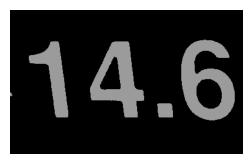

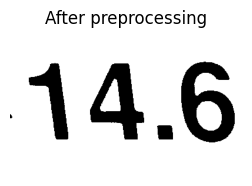

1/1 [==============================] - 1s 591ms/step
[[3.6585693e-10 4.0196056e-08 7.0152284e-09 4.7054061e-07 1.4060861e-09
  3.7604657e-08 8.7668077e-08 9.9999821e-01 4.8962043e-09 1.1974391e-06]]


In [13]:
image_path = "./cropped_images/11/S11_F03.png"

img = cv2.imread(image_path)
img = adfns.invert_thresh(img)
print(img.shape)
adfns.show_img(img, 3)


preprocess_image = adcrn.preprocess_image(img)

adfns.show_img(preprocess_image, 3, title="After preprocessing")

digit_images = adcrn.extract_digits(preprocess_image)
predictions = []

# preprocessed_digit_b = preprocess_digit_gray(digit_images[0])
preprocessed_digit_a = adcrn.preprocess_digit(digit_images[0])

prediction = crnn_model.predict(preprocessed_digit_a)

print(prediction)


In [26]:
print(preprocessed_digit.shape)

(1, 32, 32, 3)


In [35]:
# def preprocess_image(image, adaptive_block_size=31, morph_kernel_size=3):
#     # Convert the image to grayscale
#     # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Apply Gaussian blur to reduce noise
#     blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

#     # Apply adaptive thresholding to get a binary image
#     binary_image = cv2.adaptiveThreshold(
#         blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, adaptive_block_size, 2
#     )

#     # Apply morphological operations to improve the contours
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (morph_kernel_size, morph_kernel_size))
#     morphed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

#     return morphed_image

In [29]:
# def extract_digits(processed_image, area_threshold=100):
#     # Find contours in the binary image
#     contours, _ = cv2.findContours(
#         processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
#     )

#     # Initialize a list to store the bounding rectangles of each digit
#     digit_rects = []

#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         if w * h > area_threshold:  # Filter out small/noisy contours
#             digit_rects.append((x, y, w, h))

#     # Sort the digit rectangles by their x-coordinate (left-to-right)
#     digit_rects = sorted(digit_rects, key=lambda x: x[0])

#     # Extract individual digits using the bounding rectangles
#     digit_images = [processed_image[y : y + h, x : x + w] for x, y, w, h in digit_rects]

#     return digit_images

In [74]:
def preprocess(image_path_or_image):
    print("Preprocessing image...")
    if isinstance(image_path_or_image, str):
        image = cv2.imread(image_path_or_image)
    else:
        image = image_path_or_image

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological operations to separate connected digits
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    return image


In [40]:
# def extract_digits(processed_image, area_ratio_threshold=0.5):
#     # Find contours in the binary image
#     contours, _ = cv2.findContours(
#         processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
#     )

#     # Initialize a list to store the bounding rectangles of each digit
#     digit_rects = []

#     # Calculate bounding rectangles for each contour
#     rects = [cv2.boundingRect(contour) for contour in contours]
    
#     # Calculate the areas of the bounding rectangles
#     areas = [w * h for _, _, w, h in rects]
    
#     # Find the median area
#     median_area = sorted(areas)[len(areas) // 2] if areas else 0

#     for rect in rects:
#         x, y, w, h = rect
#         area = w * h
#         if area > median_area * area_ratio_threshold:  # Filter out small/noisy contours
#             digit_rects.append((x, y, w, h))

#     # Sort the digit rectangles by their x-coordinate (left-to-right)
#     digit_rects = sorted(digit_rects, key=lambda x: x[0])

#     # Extract individual digits using the bounding rectangles
#     digit_images = [processed_image[y : y + h, x : x + w] for x, y, w, h in digit_rects]

#     return digit_images

In [67]:
def extract_digits(processed_image, aspect_ratio_range=(0.2, 1.2)):
    # Find contours in the binary image
    contours, _ = cv2.findContours(
        processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Initialize a list to store the bounding rectangles of each digit
    digit_rects = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h

        if aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:  # Filter based on aspect ratio
            digit_rects.append((x, y, w, h))

    # Sort the digit rectangles by their x-coordinate (left-to-right)
    digit_rects = sorted(digit_rects, key=lambda x: x[0])

    # Extract individual digits using the bounding rectangles
    digit_images = [processed_image[y : y + h, x : x + w] for x, y, w, h in digit_rects]

    return digit_images


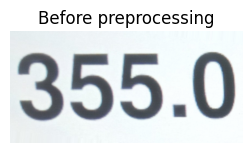

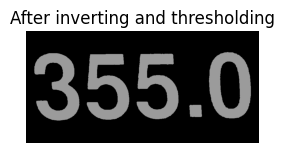

Preprocessing image...


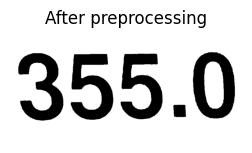

length of digit_images: 1
1/1 [==============================] - 0s 20ms/step


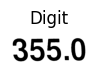

Predicted number: 9
[9]


In [80]:
image_path = "./cropped_images/11/S11_F02.png"

img = cv2.imread(image_path)
adfns.show_img(img, 3, title="Before preprocessing")
img = adfns.invert_thresh(img)
# print(img.shape)
adfns.show_img(img, 3, title="After inverting and thresholding")

preprocess_image = preprocess(img)

adfns.show_img(preprocess_image, 3, title="After preprocessing")

digit_images = extract_digits(preprocess_image, aspect_ratio_range=(0.9, 2.2))
predictions = []
print("length of digit_images:", len(digit_images))

for digit_image in digit_images:
    preprocessed_digit = adcrn.preprocess_digit(digit_image)
    prediction = crnn_model.predict(preprocessed_digit)
    digit_prediction = np.argmax(prediction)
    # print("Predicted digit:", digit_prediction)
    predictions.append(digit_prediction)
    adfns.show_img(digit_image, 1, title="Digit")

print("Predicted number:", ''.join(map(str, predictions)))
print(predictions)

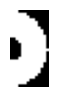

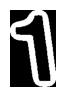

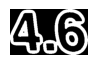

In [38]:
for digit_image in digit_images:
    adfns.show_img(digit_image, 1)

In [17]:
def ad_process_and_predict_digits(crnn_model, directory_path):
    file_list = os.listdir(directory_path)

    for file_name in file_list:
        image_path = os.path.join(directory_path, file_name)
        img = cv2.imread(image_path)
        img = adfns.invert_thresh(img)
        print(img.shape)
        adfns.show_img(img, 3)

        preprocess_image = adcrn.preprocess_image(img)

        adfns.show_img(preprocess_image, 3, title="After preprocessing")

        inverted_image = cv2.bitwise_not(preprocess_image)

        adfns.show_img(inverted_image, 3, title="Inverted")


        digit_images = adcrn.extract_digits_bow(inverted_image)
        predictions = []

        for digit_image in digit_images:
            adfns.show_img(digit_image, 1)
            preprocessed_digit = adcrn.preprocess_digit(digit_image)
            prediction = crnn_model.predict(preprocessed_digit)
            digit_prediction = np.argmax(prediction)
            predictions.append(digit_prediction)

        print("Predicted number:", "".join(map(str, predictions)))
        print(predictions)


(247, 726)


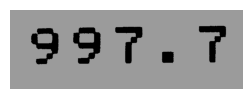

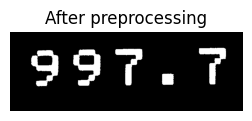

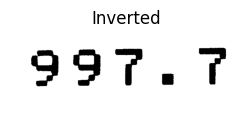

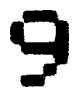

1/1 [==============================] - 0s 22ms/step


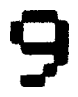

1/1 [==============================] - 0s 16ms/step


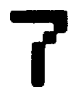

1/1 [==============================] - 0s 15ms/step


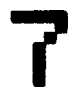

1/1 [==============================] - 0s 15ms/step
Predicted number: 9977
[9, 9, 7, 7]
(275, 696)


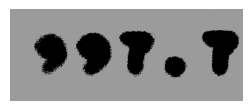

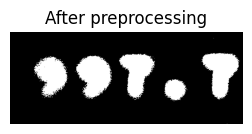

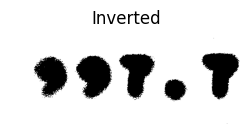

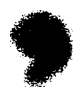

1/1 [==============================] - 0s 17ms/step


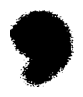

1/1 [==============================] - 0s 19ms/step


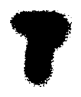

1/1 [==============================] - 0s 18ms/step


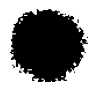

1/1 [==============================] - 0s 22ms/step


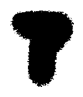

1/1 [==============================] - 0s 17ms/step
Predicted number: 99701
[9, 9, 7, 0, 1]
(300, 1182)


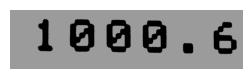

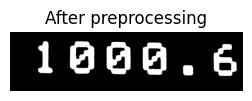

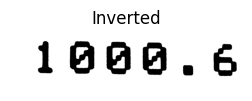

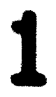

1/1 [==============================] - 0s 14ms/step


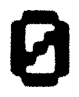

1/1 [==============================] - 0s 16ms/step


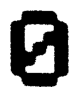

1/1 [==============================] - 0s 16ms/step


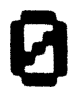

1/1 [==============================] - 0s 17ms/step


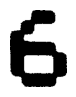

1/1 [==============================] - 0s 19ms/step
Predicted number: 10006
[1, 0, 0, 0, 6]
(484, 1236)


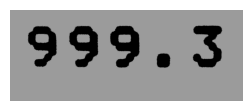

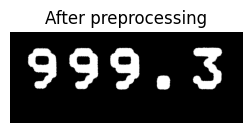

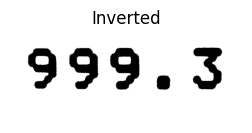

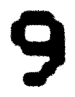

1/1 [==============================] - 0s 15ms/step


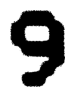

1/1 [==============================] - 0s 21ms/step


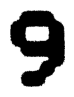

1/1 [==============================] - 0s 18ms/step


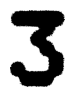

1/1 [==============================] - 0s 18ms/step
Predicted number: 9993
[9, 9, 9, 3]
(272, 844)


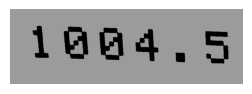

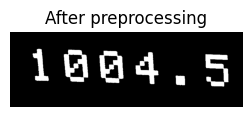

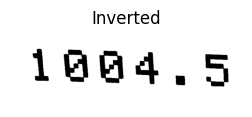

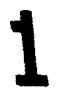

1/1 [==============================] - 0s 17ms/step


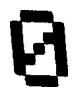

1/1 [==============================] - 0s 15ms/step


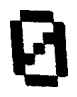

1/1 [==============================] - 0s 16ms/step


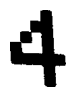

1/1 [==============================] - 0s 16ms/step


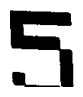

1/1 [==============================] - 0s 18ms/step
Predicted number: 10045
[1, 0, 0, 4, 5]
(223, 761)


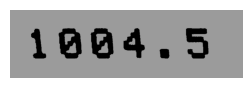

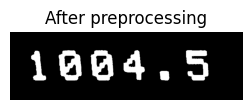

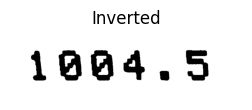

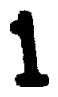

1/1 [==============================] - 0s 15ms/step


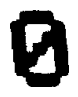

1/1 [==============================] - 0s 15ms/step


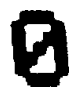

1/1 [==============================] - 0s 16ms/step


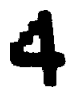

1/1 [==============================] - 0s 16ms/step


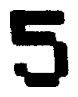

1/1 [==============================] - 0s 16ms/step
Predicted number: 10045
[1, 0, 0, 4, 5]
(178, 586)


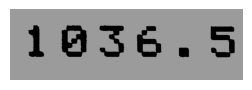

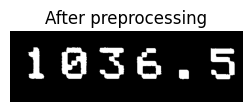

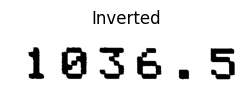

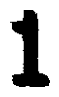

1/1 [==============================] - 0s 20ms/step


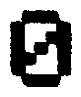

1/1 [==============================] - 0s 16ms/step


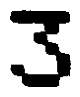

1/1 [==============================] - 0s 15ms/step


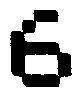

1/1 [==============================] - 0s 19ms/step


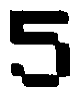

1/1 [==============================] - 0s 15ms/step
Predicted number: 10365
[1, 0, 3, 6, 5]
(285, 1081)


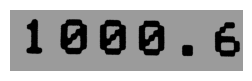

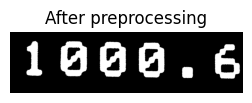

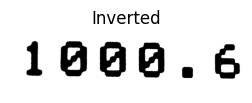

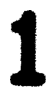

1/1 [==============================] - 0s 14ms/step


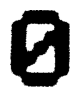

1/1 [==============================] - 0s 17ms/step


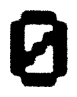

1/1 [==============================] - 0s 18ms/step


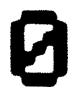

1/1 [==============================] - 0s 14ms/step


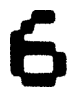

1/1 [==============================] - 0s 16ms/step
Predicted number: 10006
[1, 0, 0, 0, 6]
(273, 709)


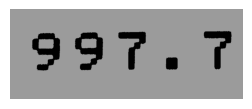

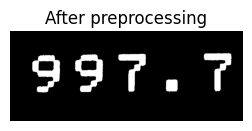

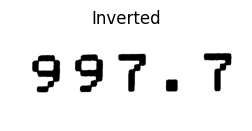

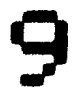

1/1 [==============================] - 0s 14ms/step


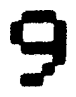

1/1 [==============================] - 0s 15ms/step


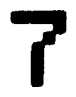

1/1 [==============================] - 0s 19ms/step


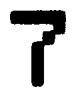

1/1 [==============================] - 0s 19ms/step
Predicted number: 9977
[9, 9, 7, 7]
(202, 594)


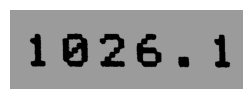

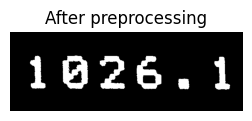

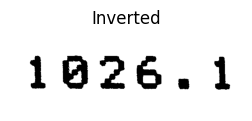

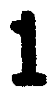

1/1 [==============================] - 0s 15ms/step


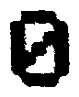

1/1 [==============================] - 0s 19ms/step


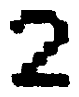

1/1 [==============================] - 0s 16ms/step


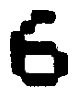

1/1 [==============================] - 0s 17ms/step


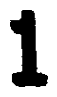

1/1 [==============================] - 0s 16ms/step
Predicted number: 10261
[1, 0, 2, 6, 1]
(162, 628)


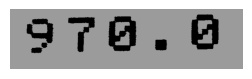

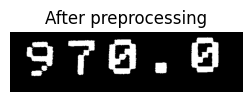

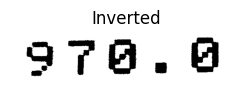

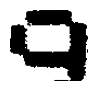

1/1 [==============================] - 0s 21ms/step


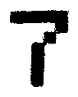

1/1 [==============================] - 0s 16ms/step


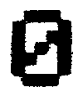

1/1 [==============================] - 0s 15ms/step


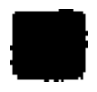

1/1 [==============================] - 0s 15ms/step


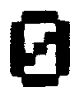

1/1 [==============================] - 0s 15ms/step
Predicted number: 07000
[0, 7, 0, 0, 0]
(200, 614)


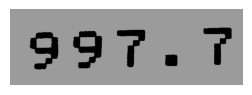

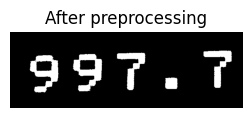

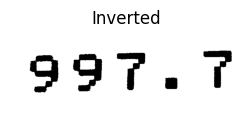

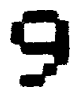

1/1 [==============================] - 0s 16ms/step


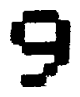

1/1 [==============================] - 0s 17ms/step


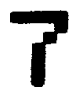

1/1 [==============================] - 0s 22ms/step


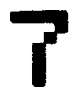

1/1 [==============================] - 0s 17ms/step
Predicted number: 9977
[9, 9, 7, 7]
(227, 775)


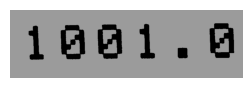

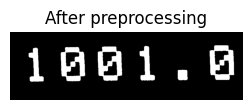

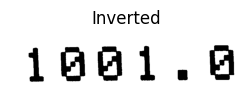

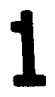

1/1 [==============================] - 0s 16ms/step


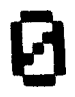

1/1 [==============================] - 0s 17ms/step


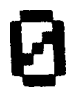

1/1 [==============================] - 0s 16ms/step


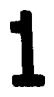

1/1 [==============================] - 0s 18ms/step


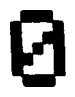

1/1 [==============================] - 0s 16ms/step
Predicted number: 10010
[1, 0, 0, 1, 0]
(333, 793)


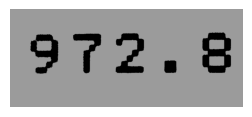

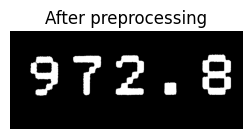

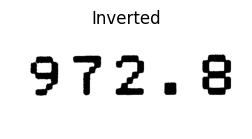

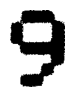

1/1 [==============================] - 0s 14ms/step


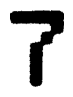

1/1 [==============================] - 0s 17ms/step


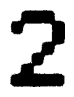

1/1 [==============================] - 0s 45ms/step


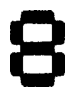

1/1 [==============================] - 0s 18ms/step
Predicted number: 9728
[9, 7, 2, 8]
(182, 623)


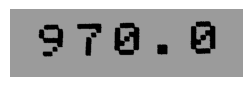

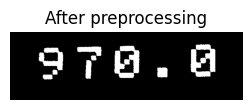

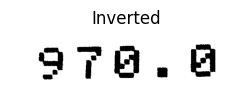

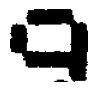

1/1 [==============================] - 0s 18ms/step


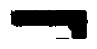

1/1 [==============================] - 0s 16ms/step


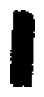

1/1 [==============================] - 0s 17ms/step


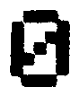

1/1 [==============================] - 0s 16ms/step


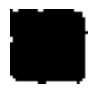

1/1 [==============================] - 0s 15ms/step


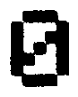

1/1 [==============================] - 0s 17ms/step
Predicted number: 050000
[0, 5, 0, 0, 0, 0]
(214, 674)


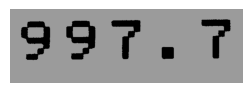

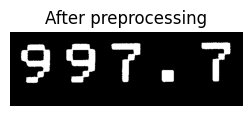

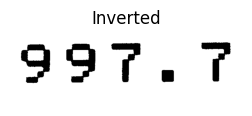

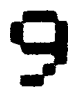

1/1 [==============================] - 0s 16ms/step


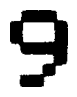

1/1 [==============================] - 0s 18ms/step


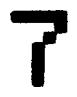

1/1 [==============================] - 0s 18ms/step


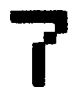

1/1 [==============================] - 0s 17ms/step
Predicted number: 9977
[9, 9, 7, 7]
(192, 535)


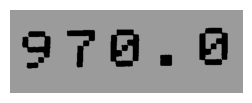

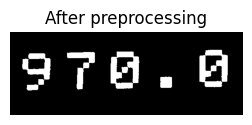

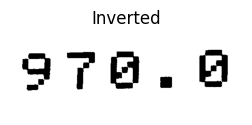

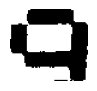

1/1 [==============================] - 0s 16ms/step


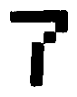

1/1 [==============================] - 0s 31ms/step


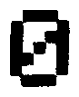

1/1 [==============================] - 0s 14ms/step


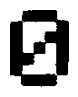

1/1 [==============================] - 0s 14ms/step
Predicted number: 0700
[0, 7, 0, 0]
(211, 694)


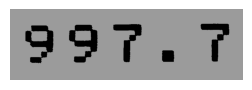

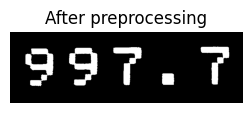

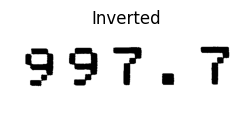

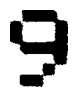

1/1 [==============================] - 0s 16ms/step


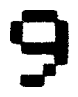

1/1 [==============================] - 0s 15ms/step


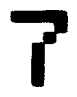

1/1 [==============================] - 0s 15ms/step


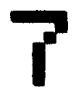

1/1 [==============================] - 0s 15ms/step
Predicted number: 9977
[9, 9, 7, 7]
(211, 601)


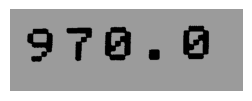

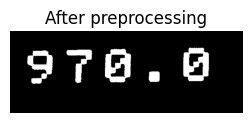

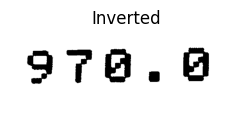

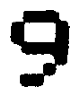

1/1 [==============================] - 0s 16ms/step


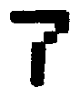

1/1 [==============================] - 0s 17ms/step


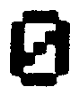

1/1 [==============================] - 0s 18ms/step


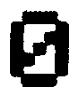

1/1 [==============================] - 0s 17ms/step
Predicted number: 9700
[9, 7, 0, 0]
(184, 589)


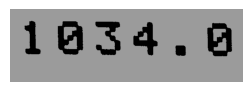

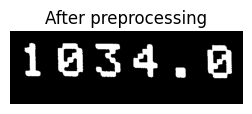

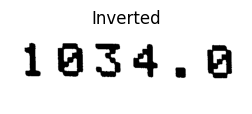

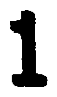

1/1 [==============================] - 0s 15ms/step


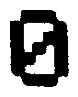

1/1 [==============================] - 0s 18ms/step


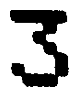

1/1 [==============================] - 0s 18ms/step


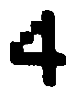

1/1 [==============================] - 0s 15ms/step


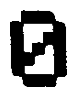

1/1 [==============================] - 0s 17ms/step
Predicted number: 10340
[1, 0, 3, 4, 0]


In [18]:
ad_process_and_predict_digits(crnn_model, "./cropped_images/9/")